# Imports


In [2]:
import essentia
import math
import essentia.standard as es
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
def find_ab(mat_a, mat_b, mat_result):
    diff_min = float("inf")
    a_opt = 0
    b_opt = 0

    for a in np.arange(0, 1, 0.01):
        b = 1 - a
        comb_mat = a * mat_a + b * mat_b
        diff = np.sum(np.abs(comb_mat - mat_result))

        if diff < diff_min:
            diff_min = diff
            a_opt = a
            b_opt = b
    return a_opt, b_opt

# Loading Samples


In [4]:
tri = essentia.standard.MonoLoader(filename="new_samples/Tri_440Hz_Cut_1.wav")
tri1 = essentia.standard.MonoLoader(filename="new_samples/Tri+_440Hz_Cut_1.wav")
trisaw = essentia.standard.MonoLoader(filename="new_samples/TriSaw_440Hz_Cut_1.wav")
trisaw1 = essentia.standard.MonoLoader(filename="new_samples/TriSaw+_440Hz_Cut_1.wav")
saw = essentia.standard.MonoLoader(filename="new_samples/Saw_440Hz_Cut_1.wav")

tri_audio = tri().copy()
tri1_audio = tri1().copy()
trisaw_audio = trisaw().copy()
trisaw1_audio = trisaw1().copy()
saw_audio = saw().copy()

sample_dict = {
    "tri": tri_audio,
    "tri+": tri1_audio,
    "trisaw": trisaw_audio,
    "trisaw+": trisaw1_audio,
    "saw": saw_audio,
}

# Arbol de decision


Depth: 1, Decision Tree Regressor R^2: 0.7451695044771667
Depth: 2, Decision Tree Regressor R^2: 0.9383627220996125
Depth: 3, Decision Tree Regressor R^2: 0.9837538143852046
Depth: 4, Decision Tree Regressor R^2: 0.9964030219553183
Depth: 5, Decision Tree Regressor R^2: 0.9996823050793023
Depth: 6, Decision Tree Regressor R^2: 0.9998908396149242
Depth: 7, Decision Tree Regressor R^2: 1.0
Depth: 8, Decision Tree Regressor R^2: 1.0
Depth: 9, Decision Tree Regressor R^2: 1.0
Depth: 10, Decision Tree Regressor R^2: 1.0
Best depth: 7, Best R^2: 1.0


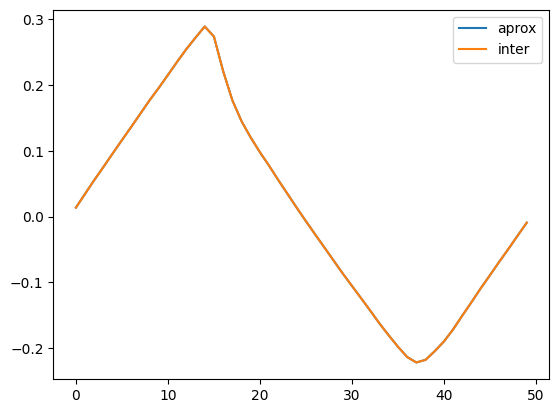

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

input_data = np.column_stack((tri_audio, saw_audio))
best_r2 = -1
best_depth = -1
for depth in range(1, 11):
    tree_reg = DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(input_data, tri1_audio)
    y_pred = tree_reg.predict(input_data)
    tree_r2 = r2_score(tri1_audio, y_pred)

    if tree_r2 > best_r2:
        best_r2 = tree_r2
        best_depth = depth

    print(f"Depth: {depth}, Decision Tree Regressor R^2: {tree_r2}")

print(f"Best depth: {best_depth}, Best R^2: {best_r2}")


plt.plot(y_pred, label="aprox")
plt.plot(tri1_audio, label="inter")
plt.legend()
plt.show()

Depth: 1, Decision Tree Regressor R^2: 0.782395322236914
Depth: 2, Decision Tree Regressor R^2: 0.9366992977710688
Depth: 3, Decision Tree Regressor R^2: 0.9695688886754356
Depth: 4, Decision Tree Regressor R^2: 0.9877042071880692
Depth: 5, Decision Tree Regressor R^2: 0.9970932490212143
Depth: 6, Decision Tree Regressor R^2: 0.9993774564412955
Depth: 7, Decision Tree Regressor R^2: 0.9999136314102081
Depth: 8, Decision Tree Regressor R^2: 0.9999865731981268
Depth: 9, Decision Tree Regressor R^2: 0.9999962318856029
Depth: 10, Decision Tree Regressor R^2: 1.0
Best depth: 10, Best R^2: 1.0


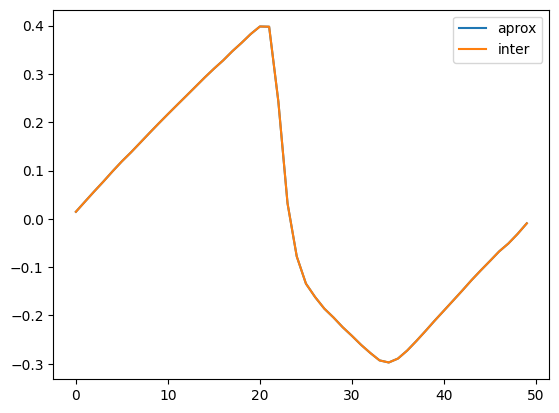

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

input_data = np.column_stack((tri_audio, saw_audio))
best_r2 = -1
best_depth = -1
for depth in range(1, 11):
    tree_reg = DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(input_data, trisaw_audio)
    y_pred = tree_reg.predict(input_data)
    tree_r2 = r2_score(trisaw_audio, y_pred)

    if tree_r2 > best_r2:
        best_r2 = tree_r2
        best_depth = depth

    print(f"Depth: {depth}, Decision Tree Regressor R^2: {tree_r2}")

print(f"Best depth: {best_depth}, Best R^2: {best_r2}")


plt.plot(y_pred, label="aprox")
plt.plot(trisaw_audio, label="inter")
plt.legend()
plt.show()

Depth: 1, Decision Tree Regressor R^2: 0.765072355751957
Depth: 2, Decision Tree Regressor R^2: 0.9155604861281912
Depth: 3, Decision Tree Regressor R^2: 0.9659211666831647
Depth: 4, Decision Tree Regressor R^2: 0.9922516440486985
Depth: 5, Decision Tree Regressor R^2: 0.998292275271714
Depth: 6, Decision Tree Regressor R^2: 0.999812156568754
Depth: 7, Decision Tree Regressor R^2: 0.9999999906158221
Depth: 8, Decision Tree Regressor R^2: 1.0
Depth: 9, Decision Tree Regressor R^2: 1.0
Depth: 10, Decision Tree Regressor R^2: 1.0
Best depth: 8, Best R^2: 1.0


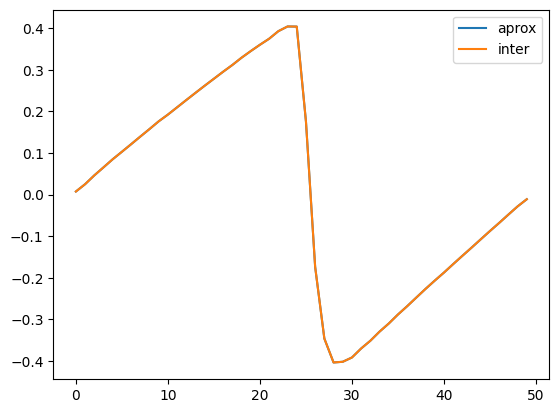

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

input_data = np.column_stack((tri_audio, saw_audio))
best_r2 = -1
best_depth = -1
for depth in range(1, 11):
    tree_reg = DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(input_data, trisaw1_audio)
    y_pred = tree_reg.predict(input_data)
    tree_r2 = r2_score(trisaw1_audio, y_pred)

    if tree_r2 > best_r2:
        best_r2 = tree_r2
        best_depth = depth

    print(f"Depth: {depth}, Decision Tree Regressor R^2: {tree_r2}")

print(f"Best depth: {best_depth}, Best R^2: {best_r2}")


plt.plot(y_pred, label="aprox")
plt.plot(trisaw1_audio, label="inter")
plt.legend()
plt.show()

### Decision Tree withouth the intermediate wave


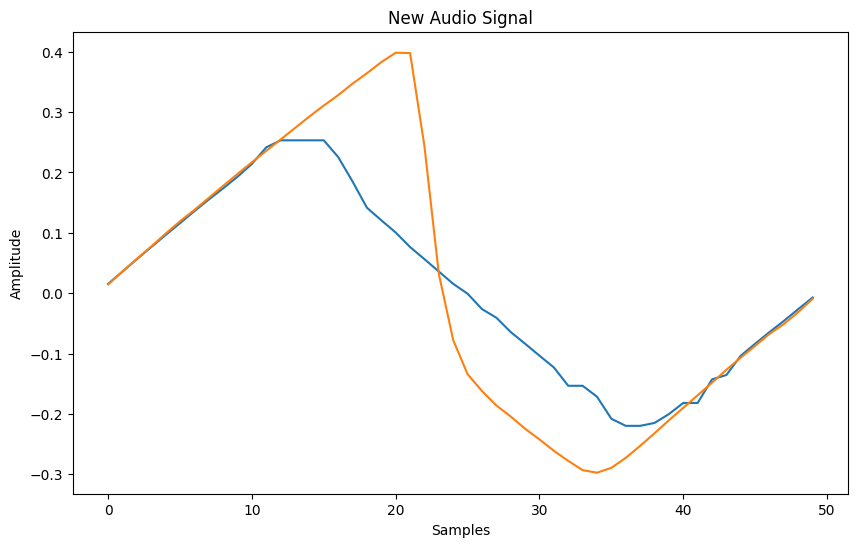

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Reshape data1 and data2 to have 2D shape (n_samples, 1) required by scikit-learn
data1_reshaped = tri_audio.reshape(-1, 1)
data2_reshaped = saw_audio.reshape(-1, 1)

# Combine data1 and data2 as features
X = np.hstack((data1_reshaped, data2_reshaped))

# Train a decision tree with max_depth = 10 using data1 and data2 as features and targets
model = DecisionTreeRegressor(max_depth=10).fit(X, tri_audio)


def generate_audio_data(data1, data2):
    data1_reshaped = data1.reshape(-1, 1)
    data2_reshaped = data2.reshape(-1, 1)
    X = np.hstack((data1_reshaped, data2_reshaped))
    return model.predict(X)


# Generate a new audio signal using the trained decision tree model and data1 and data2 as inputs
new_audio_signal = generate_audio_data(tri1_audio, saw_audio)

# Plot the new_audio_signal
plt.figure(figsize=(10, 6))
plt.plot(new_audio_signal)
plt.plot(trisaw_audio)
plt.title("New Audio Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# import numpy as np
# import soundfile as sf

# data1 = tri_audio
# data2 = saw_audio
# data3 = trisaw_audio

# # Reshape data1 and data2 to have 2D shape (n_samples, 1) required by scikit-learn
# data1_reshaped = data1.reshape(-1, 1)
# data2_reshaped = data2.reshape(-1, 1)

# # Combine data1 and data2 as features
# X = np.hstack((data1_reshaped, data2_reshaped))

# # Use data3 as the target variable
# y = data3

# # Train a decision tree with max_depth = 10
# model = DecisionTreeRegressor(max_depth=10).fit(X, y)


# def generate_audio_data(data1, data2):
#     data1_reshaped = data1.reshape(-1, 1)
#     data2_reshaped = data2.reshape(-1, 1)
#     X = np.hstack((data1_reshaped, data2_reshaped))
#     return model.predict(X)


# # Generate data3 using the trained decision tree model
# data3_generated = generate_audio_data(data1, data2)

# # Convert the generated data to a format suitable for audio playback
# audio_data = (data3_generated * 32767).astype(np.int16)

# # Set the sample rate
# sample_rate = 44100  # Adjust the sample rate as needed

# # Save the generated audio data as a WAV file
# sf.write("generated_audio.wav", audio_data, sample_rate)